In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('basketball.xlsx')
df.head()

,X1,X2,X3,X4,X5
0,6.8,225,0.442,0.672,9.2
1,6.3,180,0.435,0.797,11.7
2,6.4,190,0.456,0.761,15.8
3,6.2,180,0.416,0.651,8.6
4,6.9,205,0.449,0.900,23.2


In [2]:
df.rename(columns={'X1':'height'}, inplace='True')
df.rename(columns={'X2':'weight'}, inplace='True')
df.rename(columns={'X3':'FG%'}, inplace='True')
df.rename(columns={'X4':'FT%'}, inplace='True')
df.rename(columns={'X5':'avg'}, inplace='True')

df.columns

Index(['height', 'weight', 'FG%', 'FT%', 'avg'], dtype='object')

In [3]:
df.mean()

height      6.587037
weight    209.907407
FG%         0.449111
FT%         0.741852
avg        11.790741
dtype: float64

### Checking for errors

In [9]:
df.isnull().sum()

height    0
weight    0
FG%       0
FT%       0
avg       0
dtype: int64

### Regression

In [33]:
# x = df.drop(columns=['avg','FT%','FG%'])
x = df.drop(columns='avg')
y = df['avg']
x.head()

,height,weight,FG%,FT%
0,6.8,225,0.442,0.672
1,6.3,180,0.435,0.797
2,6.4,190,0.456,0.761
3,6.2,180,0.416,0.651
4,6.9,205,0.449,0.900


In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=12)

In [35]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [36]:
y_pred = reg.predict(x_train)
y_pred

array([13.12718645, 12.37665694, 14.81298641, 13.44091803, 11.3729272 ,
       12.03254995, 14.55069054, 11.39769257,  8.91675101, 13.48614738,
       15.31054942,  7.14315592, 14.72955703,  7.55947416, 10.35776663,
       13.22099744,  9.50199431, 14.29182505, 11.42834176, 15.02478352,
       16.47048553,  9.74146262, 12.67636813,  8.82843943,  9.92530871,
       11.25419636, 13.0165073 , 13.53534552, 10.09199014,  8.9788419 ,
        8.38684697, 10.55735225, 11.82436304, 15.90888831, 13.51011741,
        7.73718581, 12.77334884])

### Method Evaluation

In [37]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred)

0.1912529878233481

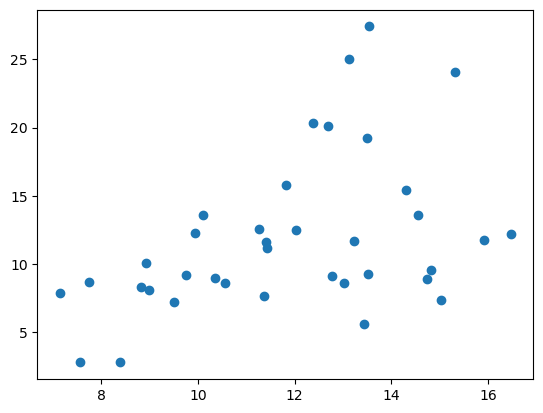

In [38]:
plt.scatter(y_pred, y_train)